In [69]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns #for background style for plots
from matplotlib.pyplot import figure #plot size
import matplotlib.style #Setting the theme of your plots

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows',100)

# Data Collection

In [70]:
data=pd.read_csv("TRAIN.csv")
print(data.shape)
data.head()

(1401, 16)


,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status
0,ADF0039,123.0,4.10,76.7140,0.00,1.25,1.4951,14.0,564.0,6408.0,2.0,2G,2G,Uxaa,Mango,0.0
1,ADF0041,1316.0,43.87,98.8904,4.14,1.25,1.0244,27.0,1626.0,4373.0,1.0,2G,2G,Uxaa,Mango,0.0
2,ADF0051,2385.0,79.50,372.6300,3.51,1.25,6.0898,119.0,10411.0,22039.0,1.0,2G,2G,Weematel,Mango,0.0
3,ADF0059,1614.0,53.80,530.2000,6.85,1.25,3.3447,69.0,6822.0,6274.0,1.0,2G,2G,0,Mango,0.0
4,ADF0060,2175.0,72.50,554.1300,6.99,153.75,673204.0342,33.0,3387.0,7241.0,1.0,2G,3G,Weematel,Mango,0.0


# EDA & Preprocessing

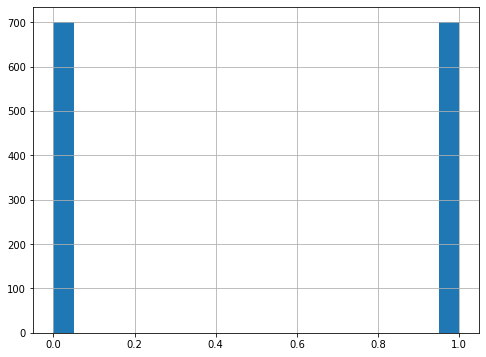

In [71]:
data['Churn Status'].hist(bins =20, figsize =(8,6))

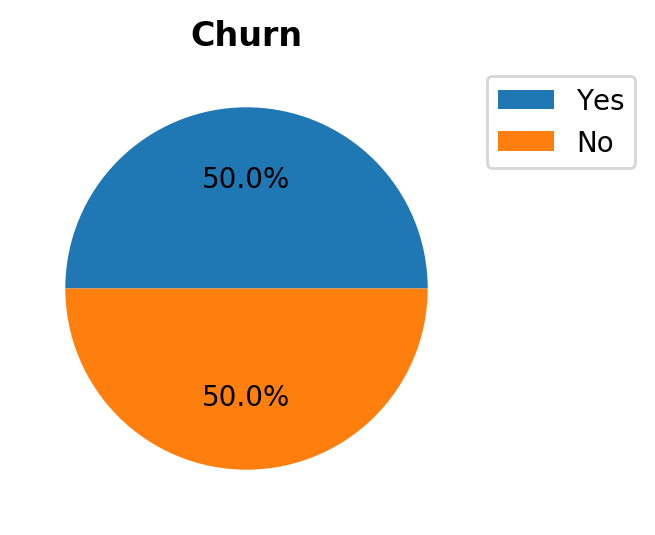

In [72]:
#Pie Chart
#Calculating Churn Percentage
yes=len(data[data['Churn Status']==1.0])
no=len(data[data['Churn Status']==0.0])
tot=len(data)

yes=(yes/tot)*100
no=(no/tot)*100

Churn_Perc=[yes,no]
figure(num=None, figsize=(5, 3), dpi=200)
plt.pie(Churn_Perc,autopct='%1.1f%%')
plt.title("Churn",weight="bold")
labels=['Yes','No']
plt.legend(labels,bbox_to_anchor=(1, 1))
plt.show()

Exactly it is balanced data

In [73]:
data.columns=data.columns.str.replace(' ', '')

In [74]:
data.columns

Index(['CustomerID', 'network_age', 'Customertenureinmonth',
       'TotalSpendinMonths1and2of2017', 'TotalSMSSpend', 'TotalDataSpend',
       'TotalDataConsumption', 'TotalUniqueCalls', 'TotalOnnetspend',
       'TotalOffnetspend', 'TotalCallcentrecomplaintcalls',
       'NetworktypesubscriptioninMonth1', 'NetworktypesubscriptioninMonth2',
       'MostLovedCompetitornetworkininMonth1',
       'MostLovedCompetitornetworkininMonth2', 'ChurnStatus'],
      dtype='object')

In [75]:
data.describe()

,network_age,Customertenureinmonth,TotalSpendinMonths1and2of2017,TotalSMSSpend,TotalDataSpend,TotalDataConsumption,TotalUniqueCalls,TotalOnnetspend,TotalOffnetspend,TotalCallcentrecomplaintcalls,ChurnStatus
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1.400000e+03,1400.000000,1400.000000,1400.00000,1400.000000,1400.000000
mean,1450.634286,48.354479,805.641729,30.394286,58.482293,2.162307e+06,202.422143,6814.392143,15730.42000,1.922143,0.500000
std,1276.008188,42.533536,1251.742068,60.885095,289.613589,6.865958e+06,302.036220,16707.784943,37448.94212,2.345515,0.500179
min,-5.000000,-0.170000,4.910000,0.000000,0.000000,5.860000e-02,1.000000,0.000000,0.00000,1.000000,0.000000
25%,287.000000,9.567500,155.537500,2.620000,1.250000,1.384346e+03,18.000000,60.000000,1123.00000,1.000000,0.000000
50%,1171.000000,39.030000,606.575000,13.715000,11.250000,1.193487e+05,81.500000,1617.000000,4171.00000,1.000000,0.500000
75%,2242.000000,74.732500,1018.395500,31.205000,42.812500,1.206785e+06,254.250000,7177.750000,13151.50000,2.000000,1.000000
max,5451.000000,181.700000,24438.830000,873.980000,8295.000000,9.945640e+07,2596.000000,381174.000000,431440.00000,49.000000,1.000000


In [76]:
data.dtypes

CustomerID                               object
network_age                             float64
Customertenureinmonth                   float64
TotalSpendinMonths1and2of2017           float64
TotalSMSSpend                           float64
TotalDataSpend                          float64
TotalDataConsumption                    float64
TotalUniqueCalls                        float64
TotalOnnetspend                         float64
TotalOffnetspend                        float64
TotalCallcentrecomplaintcalls           float64
NetworktypesubscriptioninMonth1          object
NetworktypesubscriptioninMonth2          object
MostLovedCompetitornetworkininMonth1     object
MostLovedCompetitornetworkininMonth2     object
ChurnStatus                             float64
dtype: object

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401 entries, 0 to 1400
Data columns (total 16 columns):
CustomerID                              1400 non-null object
network_age                             1400 non-null float64
Customertenureinmonth                   1400 non-null float64
TotalSpendinMonths1and2of2017           1400 non-null float64
TotalSMSSpend                           1400 non-null float64
TotalDataSpend                          1400 non-null float64
TotalDataConsumption                    1400 non-null float64
TotalUniqueCalls                        1400 non-null float64
TotalOnnetspend                         1400 non-null float64
TotalOffnetspend                        1400 non-null float64
TotalCallcentrecomplaintcalls           1400 non-null float64
NetworktypesubscriptioninMonth1         1225 non-null object
NetworktypesubscriptioninMonth2         1256 non-null object
MostLovedCompetitornetworkininMonth1    1399 non-null object
MostLovedCompetitornetworkini

In [78]:
#Missing Values identifying

data.isnull().sum()

CustomerID                                1
network_age                               1
Customertenureinmonth                     1
TotalSpendinMonths1and2of2017             1
TotalSMSSpend                             1
TotalDataSpend                            1
TotalDataConsumption                      1
TotalUniqueCalls                          1
TotalOnnetspend                           1
TotalOffnetspend                          1
TotalCallcentrecomplaintcalls             1
NetworktypesubscriptioninMonth1         176
NetworktypesubscriptioninMonth2         145
MostLovedCompetitornetworkininMonth1      2
MostLovedCompetitornetworkininMonth2      2
ChurnStatus                               1
dtype: int64

In [79]:
data['NetworktypesubscriptioninMonth1'].unique()

array(['2G', '3G', 'Other', nan], dtype=object)

In [80]:
data['NetworktypesubscriptioninMonth2'].unique()

array(['2G', '3G', nan, 'Other'], dtype=object)

Replace null values in these columns with 'Other'

In [81]:
data['NetworktypesubscriptioninMonth2'].fillna('Other', inplace = True)
data['NetworktypesubscriptioninMonth1'].fillna('Other', inplace = True)
data.isnull().sum()

CustomerID                              1
network_age                             1
Customertenureinmonth                   1
TotalSpendinMonths1and2of2017           1
TotalSMSSpend                           1
TotalDataSpend                          1
TotalDataConsumption                    1
TotalUniqueCalls                        1
TotalOnnetspend                         1
TotalOffnetspend                        1
TotalCallcentrecomplaintcalls           1
NetworktypesubscriptioninMonth1         0
NetworktypesubscriptioninMonth2         0
MostLovedCompetitornetworkininMonth1    2
MostLovedCompetitornetworkininMonth2    2
ChurnStatus                             1
dtype: int64

Remove remaining null values


In [82]:
data=data.dropna()
data.isnull().sum()

CustomerID                              0
network_age                             0
Customertenureinmonth                   0
TotalSpendinMonths1and2of2017           0
TotalSMSSpend                           0
TotalDataSpend                          0
TotalDataConsumption                    0
TotalUniqueCalls                        0
TotalOnnetspend                         0
TotalOffnetspend                        0
TotalCallcentrecomplaintcalls           0
NetworktypesubscriptioninMonth1         0
NetworktypesubscriptioninMonth2         0
MostLovedCompetitornetworkininMonth1    0
MostLovedCompetitornetworkininMonth2    0
ChurnStatus                             0
dtype: int64

In [83]:
data.shape

(1399, 16)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D1E08ABE08>,
      dtype=object)

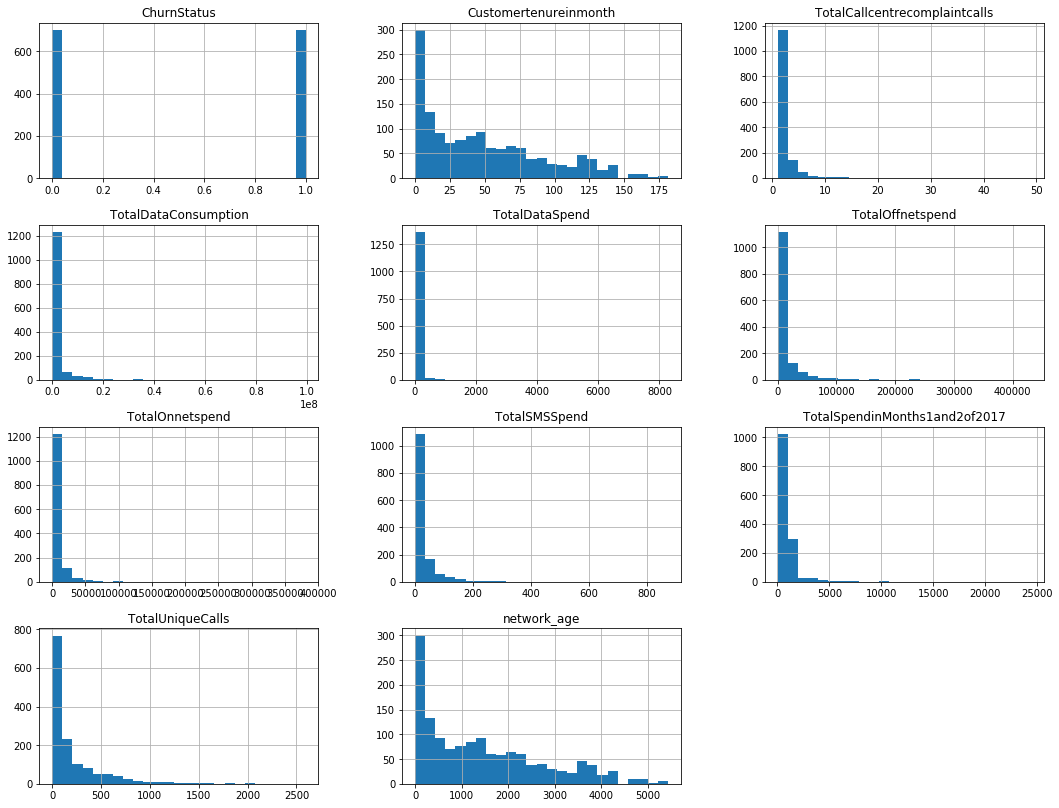

In [84]:
data.hist(bins=25 ,figsize=(18,14))

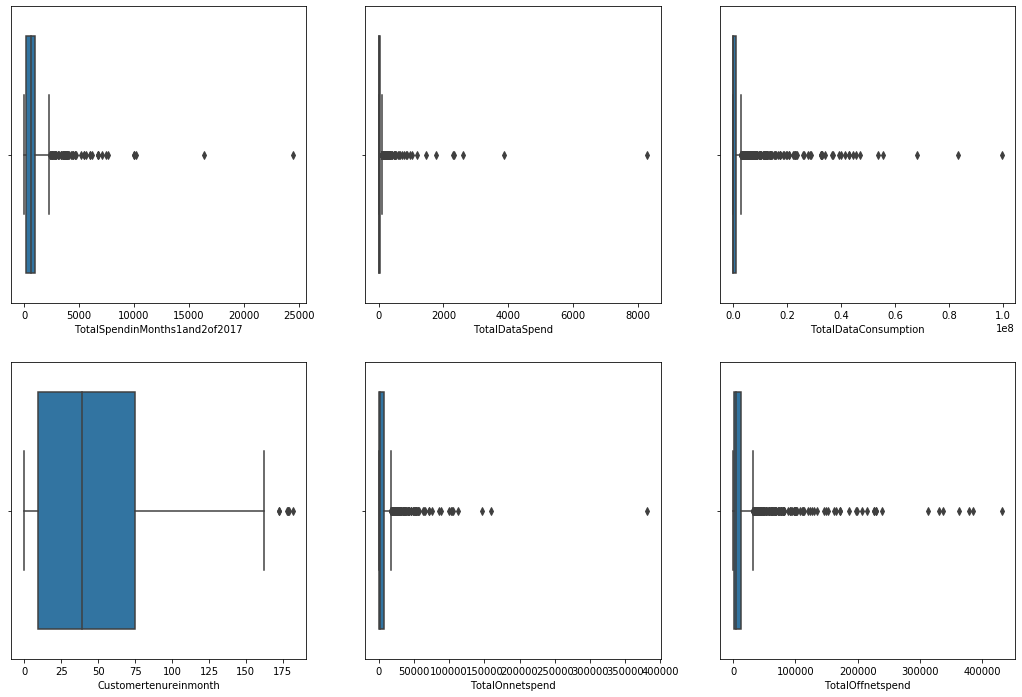

In [85]:
#Outlier Identification 

fig, axs = plt.subplots(2,3, figsize = (18,12))

sns.boxplot(data['TotalSpendinMonths1and2of2017'], ax = axs[0][0])
sns.boxplot(data['TotalDataSpend'], ax = axs[0][1])
sns.boxplot(data['TotalDataConsumption'], ax = axs[0][2])

sns.boxplot(data['Customertenureinmonth'], ax = axs[1][0])
sns.boxplot(data['TotalOnnetspend'], ax = axs[1][1])
sns.boxplot(data['TotalOffnetspend'], ax = axs[1][2])


plt.tight_layout
plt.show()

In [86]:
#Outlier imputation with median (Definition)
def Outlier_Imputation(col):
                            
                        Q1 = data[col].quantile(0.25)
                        Q3 = data[col].quantile(0.75)
                        IQR = Q3 - Q1
                        median = float(data[col].mean())
                        data[col] = np.where(~((data[col] >= Q1 - 1.5*IQR) & (data[col]<= Q3 + 1.5*IQR)), median, data[col])
                        print(sns.boxplot(data[col]))


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


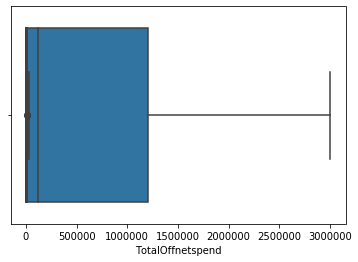

In [87]:
col =['TotalSpendinMonths1and2of2017','TotalDataSpend','TotalDataConsumption',
      'Customertenureinmonth','TotalOnnetspend','TotalOffnetspend']
for i in col:
    Outlier_Imputation(i)

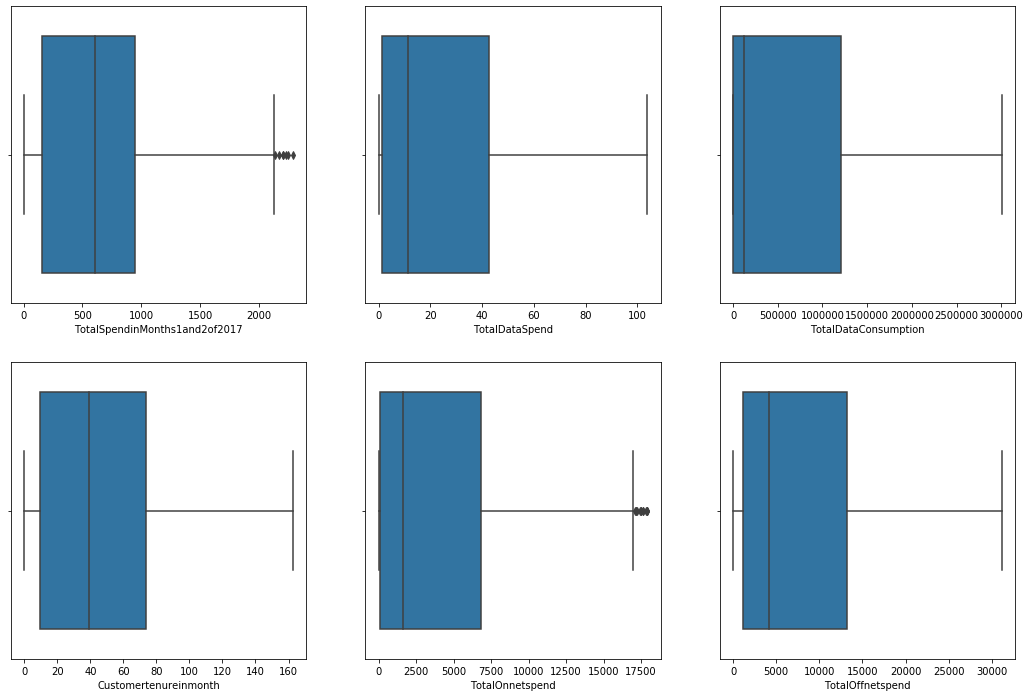

In [88]:
fig, axs = plt.subplots(2,3, figsize = (18,12))

sns.boxplot(data['TotalSpendinMonths1and2of2017'], ax = axs[0][0])
sns.boxplot(data['TotalDataSpend'], ax = axs[0][1])
sns.boxplot(data['TotalDataConsumption'], ax = axs[0][2])

sns.boxplot(data['Customertenureinmonth'], ax = axs[1][0])
sns.boxplot(data['TotalOnnetspend'], ax = axs[1][1])
sns.boxplot(data['TotalOffnetspend'], ax = axs[1][2])


plt.tight_layout
plt.show()

All outliers are imputed

In [98]:
#Categorical Column

cat_cols=data.select_dtypes(exclude=['int64', 'float']).columns[1:]
cat_cols

Index(['NetworktypesubscriptioninMonth1', 'NetworktypesubscriptioninMonth2',
       'MostLovedCompetitornetworkininMonth1',
       'MostLovedCompetitornetworkininMonth2'],
      dtype='object')

In [104]:
import scipy.stats


chi_df=pd.DataFrame(columns=cat_cols,index=cat_cols)

for idx in cat_cols:
    rec=[]
    for col2 in cat_cols:
        df=pd.crosstab(data[idx],data[col2])
        chi= scipy.stats.chi2_contingency(df)
        rec.append(chi[1])
    chi_df.loc[idx] = rec
    

#List the items which have probability value <0.5
dep_variables=[[]]

for i in chi_df.columns:
    val=0
    for j in chi_df.columns:
        if i!=j:
            if chi_df[i][j]<0.5:
                for val in dep_variables:    
                          if ([i,j] not in dep_variables) and (([j,i] not in dep_variables)):
                             dep_variables.append([i,j])
          
del dep_variables[0] #Delete empty list [ ]from this list
dep_variables



[['NetworktypesubscriptioninMonth1', 'NetworktypesubscriptioninMonth2'],
 ['NetworktypesubscriptioninMonth1', 'MostLovedCompetitornetworkininMonth1'],
 ['NetworktypesubscriptioninMonth1', 'MostLovedCompetitornetworkininMonth2'],
 ['NetworktypesubscriptioninMonth2', 'MostLovedCompetitornetworkininMonth1'],
 ['NetworktypesubscriptioninMonth2', 'MostLovedCompetitornetworkininMonth2'],
 ['MostLovedCompetitornetworkininMonth1',
  'MostLovedCompetitornetworkininMonth2']]

Each and Evaery variable depends on another

In [105]:
data.head()

,CustomerID,network_age,Customertenureinmonth,TotalSpendinMonths1and2of2017,TotalSMSSpend,TotalDataSpend,TotalDataConsumption,TotalUniqueCalls,TotalOnnetspend,TotalOffnetspend,TotalCallcentrecomplaintcalls,NetworktypesubscriptioninMonth1,NetworktypesubscriptioninMonth2,MostLovedCompetitornetworkininMonth1,MostLovedCompetitornetworkininMonth2,ChurnStatus
0,ADF0039,123.0,4.10,76.7140,0.00,1.250000,1.4951,14.0,564.0,6408.0,2.0,2G,2G,Uxaa,Mango,0.0
1,ADF0041,1316.0,43.87,98.8904,4.14,1.250000,1.0244,27.0,1626.0,4373.0,1.0,2G,2G,Uxaa,Mango,0.0
2,ADF0051,2385.0,79.50,372.6300,3.51,1.250000,6.0898,119.0,10411.0,22039.0,1.0,2G,2G,Weematel,Mango,0.0
3,ADF0059,1614.0,53.80,530.2000,6.85,1.250000,3.3447,69.0,6822.0,6274.0,1.0,2G,2G,0,Mango,0.0
4,ADF0060,2175.0,72.50,554.1300,6.99,58.434746,673204.0342,33.0,3387.0,7241.0,1.0,2G,3G,Weematel,Mango,0.0


In [108]:
#One Hot Encoding

from sklearn.preprocessing import OneHotEncoder

data1 = pd.get_dummies(data ,columns = cat_cols )

data1.head()

,CustomerID,network_age,Customertenureinmonth,TotalSpendinMonths1and2of2017,TotalSMSSpend,TotalDataSpend,TotalDataConsumption,TotalUniqueCalls,TotalOnnetspend,TotalOffnetspend,TotalCallcentrecomplaintcalls,ChurnStatus,NetworktypesubscriptioninMonth1_2G,NetworktypesubscriptioninMonth1_3G,NetworktypesubscriptioninMonth1_Other,NetworktypesubscriptioninMonth2_2G,NetworktypesubscriptioninMonth2_3G,NetworktypesubscriptioninMonth2_Other,MostLovedCompetitornetworkininMonth1_0,MostLovedCompetitornetworkininMonth1_Mango,MostLovedCompetitornetworkininMonth1_PQza,MostLovedCompetitornetworkininMonth1_ToCall,MostLovedCompetitornetworkininMonth1_Uxaa,MostLovedCompetitornetworkininMonth1_Weematel,MostLovedCompetitornetworkininMonth1_Zintel,MostLovedCompetitornetworkininMonth2_Mango,MostLovedCompetitornetworkininMonth2_PQza,MostLovedCompetitornetworkininMonth2_ToCall,MostLovedCompetitornetworkininMonth2_Uxaa,MostLovedCompetitornetworkininMonth2_Weematel,MostLovedCompetitornetworkininMonth2_Zintel
0,ADF0039,123.0,4.10,76.7140,0.00,1.250000,1.4951,14.0,564.0,6408.0,2.0,0.0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,ADF0041,1316.0,43.87,98.8904,4.14,1.250000,1.0244,27.0,1626.0,4373.0,1.0,0.0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,ADF0051,2385.0,79.50,372.6300,3.51,1.250000,6.0898,119.0,10411.0,22039.0,1.0,0.0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3,ADF0059,1614.0,53.80,530.2000,6.85,1.250000,3.3447,69.0,6822.0,6274.0,1.0,0.0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,ADF0060,2175.0,72.50,554.1300,6.99,58.434746,673204.0342,33.0,3387.0,7241.0,1.0,0.0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [109]:
#Remove CustomerID
data2 =data1.drop('CustomerID', axis =1)

In [111]:
cr = data2.corr()
cr.ChurnStatus

network_age                                     -0.123818
Customertenureinmonth                           -0.115515
TotalSpendinMonths1and2of2017                   -0.110879
TotalSMSSpend                                    0.098836
TotalDataSpend                                  -0.059129
TotalDataConsumption                            -0.156914
TotalUniqueCalls                                -0.134596
TotalOnnetspend                                 -0.127067
TotalOffnetspend                                 0.042971
TotalCallcentrecomplaintcalls                   -0.071902
ChurnStatus                                      1.000000
NetworktypesubscriptioninMonth1_2G               0.011771
NetworktypesubscriptioninMonth1_3G              -0.046589
NetworktypesubscriptioninMonth1_Other            0.039060
NetworktypesubscriptioninMonth2_2G               0.015655
NetworktypesubscriptioninMonth2_3G              -0.067904
NetworktypesubscriptioninMonth2_Other            0.059982
MostLovedCompe

In [115]:
#Data Partition

X = data2.drop('ChurnStatus', axis =1)
y = data2['ChurnStatus']

In [116]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
norm_x = MinMaxScaler().fit_transform(X)
norm_x=pd.DataFrame(norm_x,columns=X.columns)
norm_x.head()

,network_age,Customertenureinmonth,TotalSpendinMonths1and2of2017,TotalSMSSpend,TotalDataSpend,TotalDataConsumption,TotalUniqueCalls,TotalOnnetspend,TotalOffnetspend,TotalCallcentrecomplaintcalls,NetworktypesubscriptioninMonth1_2G,NetworktypesubscriptioninMonth1_3G,NetworktypesubscriptioninMonth1_Other,NetworktypesubscriptioninMonth2_2G,NetworktypesubscriptioninMonth2_3G,NetworktypesubscriptioninMonth2_Other,MostLovedCompetitornetworkininMonth1_0,MostLovedCompetitornetworkininMonth1_Mango,MostLovedCompetitornetworkininMonth1_PQza,MostLovedCompetitornetworkininMonth1_ToCall,MostLovedCompetitornetworkininMonth1_Uxaa,MostLovedCompetitornetworkininMonth1_Weematel,MostLovedCompetitornetworkininMonth1_Zintel,MostLovedCompetitornetworkininMonth2_Mango,MostLovedCompetitornetworkininMonth2_PQza,MostLovedCompetitornetworkininMonth2_ToCall,MostLovedCompetitornetworkininMonth2_Uxaa,MostLovedCompetitornetworkininMonth2_Weematel,MostLovedCompetitornetworkininMonth2_Zintel
0,0.023460,0.026245,0.031458,0.000000,0.012048,4.781082e-07,0.005010,0.031501,0.205774,0.020833,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.242119,0.270682,0.041174,0.004737,0.012048,3.214458e-07,0.010019,0.090818,0.140426,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.438050,0.489674,0.161103,0.004016,0.012048,2.007356e-06,0.045472,0.581490,0.707717,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.296738,0.331715,0.230137,0.007838,0.012048,1.093708e-06,0.026204,0.381032,0.201471,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.399560,0.446650,0.240621,0.007998,0.563226,2.240615e-01,0.012331,0.189176,0.232523,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [117]:
#Data SPlitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(norm_x,y,test_size=0.3,random_state=1)

In [165]:
#Un normed Data SPlitting
from sklearn.model_selection import train_test_split
X1_train,X1_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

# Model Training


# Logistic Regression

Confusion matrix:  
 [[150  61]
 [ 93 116]]
accuracy_score   :    0.6333333333333333


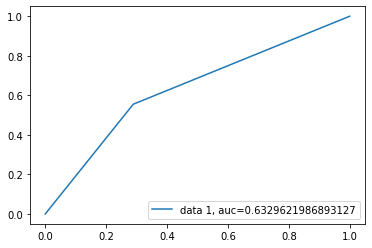

In [118]:
from sklearn.linear_model import LogisticRegression
LG=LogisticRegression()
LG.fit(X_train,y_train)

y_pred = LG.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve

print('Confusion matrix:  \n', confusion_matrix(y_test,y_pred))
print('accuracy_score   :   ', accuracy_score(y_test,y_pred))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Linear Discriminant Analysis

Confusion matrix:  
 [[151  60]
 [ 94 115]]
accuracy_score   :    0.6333333333333333


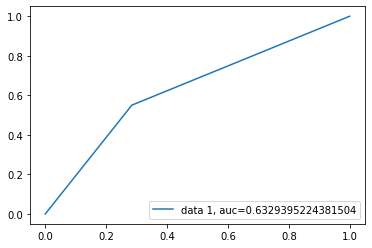

In [120]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDM=LinearDiscriminantAnalysis()
LDM.fit(X_train,y_train)

y_pred = LDM.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve

print('Confusion matrix:  \n', confusion_matrix(y_test,y_pred))
print('accuracy_score   :   ', accuracy_score(y_test,y_pred))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# NaiveBayes Classifier


Confusion matrix:  
 [[159  52]
 [ 94 115]]
accuracy_score   :    0.6523809523809524


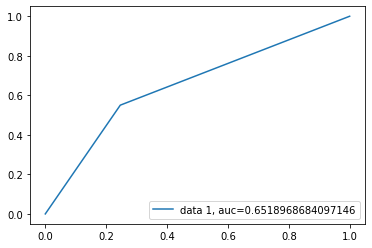

In [122]:

from sklearn.naive_bayes import GaussianNB,MultinomialNB ,BernoulliNB ,CategoricalNB
GNB=GaussianNB()
GNB.fit(X_train,y_train)
y_pred =GNB.predict(X_test)
print('Confusion matrix:  \n', confusion_matrix(y_test,y_pred))
print('accuracy_score   :   ', accuracy_score(y_test,y_pred))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Confusion matrix:  
 [[159  52]
 [100 109]]
accuracy_score   :    0.638095238095238


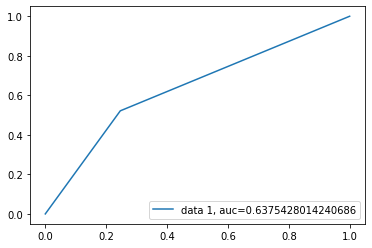

In [123]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB ,BernoulliNB ,CategoricalNB
GNB=BernoulliNB()
GNB.fit(X_train,y_train)
y_pred =GNB.predict(X_test)
print('Confusion matrix:  \n', confusion_matrix(y_test,y_pred))
print('accuracy_score   :   ', accuracy_score(y_test,y_pred))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# SVM

Confusion matrix:  
 [[162  49]
 [102 107]]
accuracy_score   :    0.6404761904761904


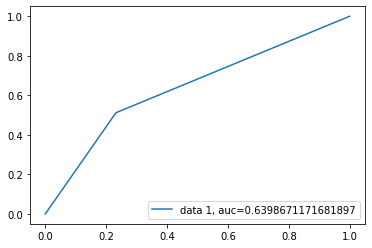

In [124]:
#Classifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SV=SVC(kernel='linear')
SV.fit(X_train,y_train)

y_pred=SV.predict(X_test)

print('Confusion matrix:  \n', confusion_matrix(y_test,y_pred))
print('accuracy_score   :   ', accuracy_score(y_test,y_pred))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Confusion matrix:  
 [[143  68]
 [ 70 139]]
accuracy_score   :    0.6714285714285714


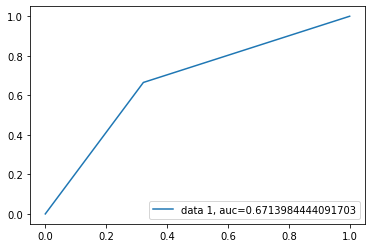

In [131]:
#Classifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SV=SVC(kernel='poly' , degree =8)
SV.fit(X_train,y_train)

y_pred=SV.predict(X_test)

print('Confusion matrix:  \n', confusion_matrix(y_test,y_pred))
print('accuracy_score   :   ', accuracy_score(y_test,y_pred))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# KNN

In [136]:

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

for i in range(1,50,2):
    KNN=KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train,y_train)

    y_pred=KNN.predict(X_test)
    print('accuracy scoe at neighbours  ',i,'=',accuracy_score(y_pred,y_test))

accuracy scoe at neighbours   1 = 0.6309523809523809
accuracy scoe at neighbours   3 = 0.65
accuracy scoe at neighbours   5 = 0.6285714285714286
accuracy scoe at neighbours   7 = 0.6404761904761904
accuracy scoe at neighbours   9 = 0.6523809523809524
accuracy scoe at neighbours   11 = 0.6523809523809524
accuracy scoe at neighbours   13 = 0.6285714285714286
accuracy scoe at neighbours   15 = 0.6309523809523809
accuracy scoe at neighbours   17 = 0.6309523809523809
accuracy scoe at neighbours   19 = 0.6333333333333333
accuracy scoe at neighbours   21 = 0.6357142857142857
accuracy scoe at neighbours   23 = 0.6285714285714286
accuracy scoe at neighbours   25 = 0.6523809523809524
accuracy scoe at neighbours   27 = 0.6476190476190476
accuracy scoe at neighbours   29 = 0.6428571428571429
accuracy scoe at neighbours   31 = 0.6476190476190476
accuracy scoe at neighbours   33 = 0.6428571428571429
accuracy scoe at neighbours   35 = 0.6309523809523809
accuracy scoe at neighbours   37 = 0.6380952380

# RFC

Confusion matrix:  
 [[175  36]
 [ 49 160]]
accuracy_score   :    0.7976190476190477


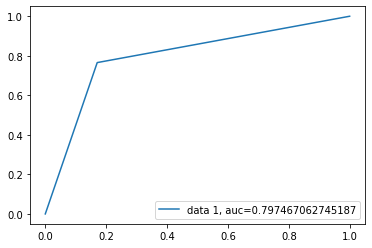

In [167]:
from sklearn.ensemble import RandomForestClassifier

RFC=RandomForestClassifier(n_estimators=400, max_depth=10 ,bootstrap= True , criterion= 'entropy')

RFC.fit(X_train,y_train)

y_pred=RFC.predict(X_test)

print('Confusion matrix:  \n', confusion_matrix(y_test,y_pred))
print('accuracy_score   :   ', accuracy_score(y_test,y_pred))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Gradient Boost & Classifier

Confusion matrix:  
 [[171  40]
 [ 37 172]]
accuracy_score   :    0.8166666666666667


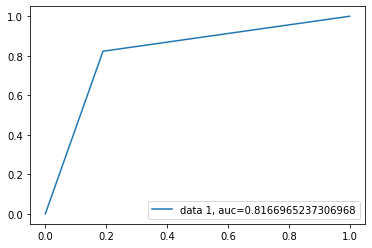

In [176]:
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor
GBC=GradientBoostingClassifier()
GBC.fit(X_train,y_train)
y_pred = GBC.predict(X_test)


print('Confusion matrix:  \n', confusion_matrix(y_test,y_pred))
print('accuracy_score   :   ', accuracy_score(y_test,y_pred))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Lets check     important features

[1.64356123e-02 2.55679840e-02 5.13202702e-01 9.14186495e-02
 2.03618239e-02 2.04457801e-02 4.14493856e-02 4.09148171e-02
 1.64221867e-01 8.81157800e-03 2.23996840e-03 2.24891565e-04
 4.39892378e-07 7.24929142e-04 0.00000000e+00 1.64845410e-05
 1.85023237e-04 6.48485273e-04 2.77562393e-04 2.50867370e-04
 2.18387087e-04 5.49441552e-04 1.45348838e-03 0.00000000e+00
 5.51171481e-04 1.13712536e-03 4.56811505e-02 0.00000000e+00
 3.01038494e-03]


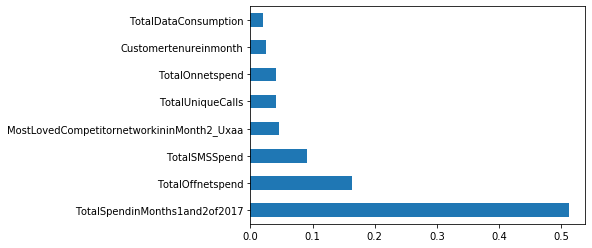

In [177]:
print(GBC.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(GBC.feature_importances_, index=X.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()


Lets test with these features

In [178]:
X2= norm_x[feat_importances.nlargest(10).index]

X2_train,X2_test,y_train,y_test = train_test_split(X2,y,test_size=0.3,random_state=1)

Confusion matrix:  
 [[172  39]
 [ 37 172]]
accuracy_score   :    0.819047619047619


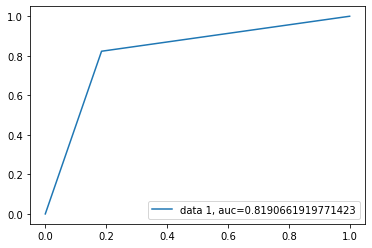

In [179]:
GBC.fit(X2_train,y_train)
y_pred = GBC.predict(X2_test)


print('Confusion matrix:  \n', confusion_matrix(y_test,y_pred))
print('accuracy_score   :   ', accuracy_score(y_test,y_pred))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

These are important features and This is the final model

In [188]:
#So i have to save model
from sklearn.externals import joblib
joblib.dump(GBC ,"churn.pkl")

['churn.pkl']

In [192]:
imp_cols =feat_importances.nlargest(10).index

In [193]:
imp_cols 

Index(['TotalSpendinMonths1and2of2017', 'TotalOffnetspend', 'TotalSMSSpend',
       'MostLovedCompetitornetworkininMonth2_Uxaa', 'TotalUniqueCalls',
       'TotalOnnetspend', 'Customertenureinmonth', 'TotalDataConsumption',
       'TotalDataSpend', 'network_age'],
      dtype='object')